# Прокофьев Игорь Витальевич
## Группа ДПИ22-1м
## Семинар 6, вариант 10

1.	Сгенерировать зашумленные сигналы из практической работы 5 (фильтрация данных). Отобразить на графике

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
%matplotlib inline

In [2]:
# Генерируем наборы данных
amp_1 = 1
amp_2 = 3
freq_1 = 15
freq_2 = 10

t = np.arange(0, 2, 0.001)

f1 = np.array(amp_1 * np.sin(2 * np.pi * freq_1 * t))
f2 = np.array(amp_2 * np.sin(2 * np.pi * freq_2 * t))

# установим seed, чтобы случайные значения не менялись при каждом перезапуске
np.random.seed(1000)
# Амплитуда шума согласно заданию 3a из семинара 5
noise_amp = min(amp_1, amp_2) / 5
# Генерируем массимв со значениями шума
noise = (np.random.random(2000) - 0.5) * noise_amp
# Накладываем шум на значения f1 и f2
f1_a = f1 + noise
f2_a = f2 + noise

# Герерируем низкочастотный синусоидальный сигнал
# согласно заданию 3b из семинара 5
sin_noise_freq = min(freq_1, freq_2) / 2
sin_noise = np.array(np.sin(2 * np.pi * sin_noise_freq * t))
# Накладываем шум на значения f1 и f2
f1_b = f1 + sin_noise
f2_b = f2 + sin_noise

# Пробуем наложить оба шума
f1_ab = f1 + noise + sin_noise
f2_ab = f2 + noise + sin_noise

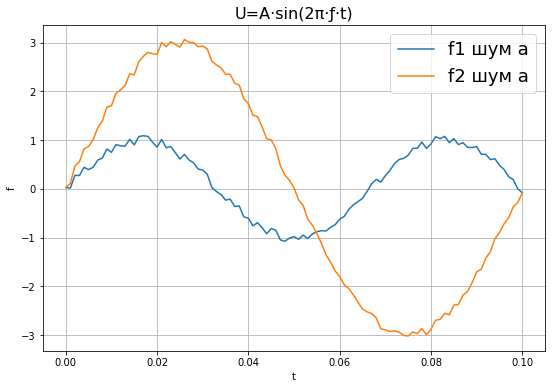

In [3]:
# Определим функцию для отрисовки графиков
def show_plot(*args, det=101):
    '''
    Формат: кортежи из nympy массива на 2000 элементов и его названия
    Пример: (f1, 'Функция 1'), ..., (fn, 'Функция n')
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    t = np.arange(0, 2, 0.001)
    plt.figure(figsize=(9, 6))
    plt.title('U=A⋅sin(2π⋅ƒ⋅t)', fontsize=16)
    plt.xlabel('t')
    plt.ylabel('f')
    plt.grid(True)
    for arg in args:
        plt.plot(t[:det], arg[0][:det], label=arg[1])
    plt.legend(fontsize=18)
    plt.show()

# Посмотрим, что получилось c графиком f1 и f2 после наложения шума
show_plot((f1_a, 'f1 шум a'),
          (f2_a, 'f2 шум a'))

2.	Применить к ним фильтрацию методом скользящей средней (использовать все три метода). Отобразить графики. 

In [4]:
# Создадим датафреймы из наших массивов данных

f1_a_pandas = pd.DataFrame(f1_a, columns=['data'])
f2_a_pandas = pd.DataFrame(f2_a, columns=['data'])

f1_b_pandas = pd.DataFrame(f1_b, columns=['data'])
f2_b_pandas = pd.DataFrame(f2_b, columns=['data'])

f1_ab_pandas = pd.DataFrame(f1_ab, columns=['data'])
f2_ab_pandas = pd.DataFrame(f2_ab, columns=['data'])

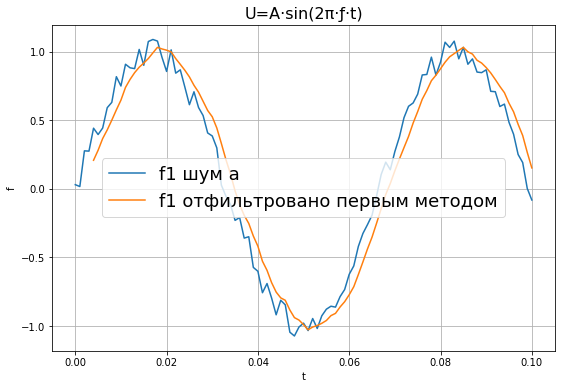

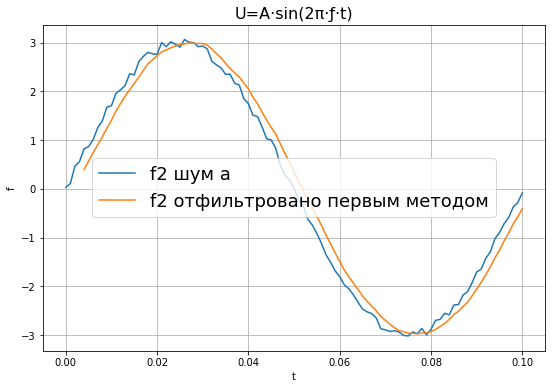

In [5]:
# Применим первый метод
f1_a_pandas['filtered_1'] = f1_a_pandas['data'].rolling(window=5).mean()
f2_a_pandas['filtered_1'] = f2_a_pandas['data'].rolling(window=5).mean()

# Посмотрим, что получилось c графиком f1
show_plot((f1_a_pandas['data'], 'f1 шум a'),
          (f1_a_pandas['filtered_1'], 'f1 отфильтровано первым методом'))
print()
# Посмотрим, что получилось c графиком f2
show_plot((f2_a_pandas['data'], 'f2 шум a'),
          (f2_a_pandas['filtered_1'], 'f2 отфильтровано первым методом'))

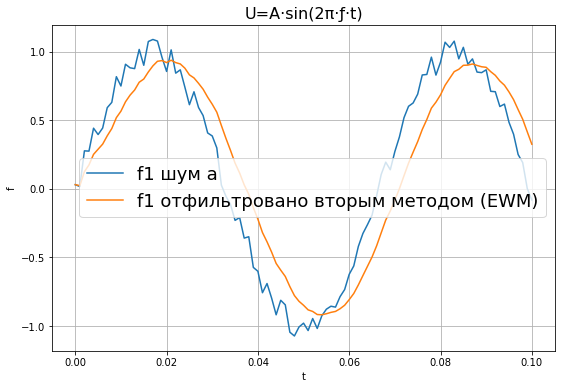

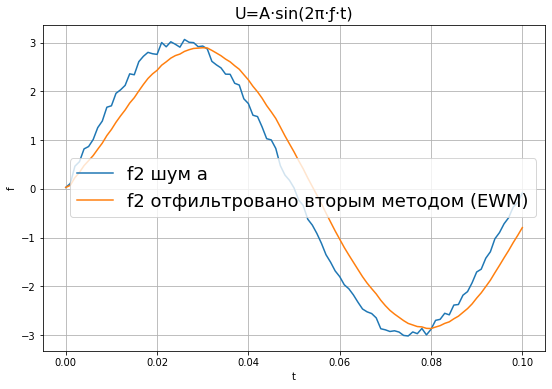

In [6]:
# Применим второй метод
f1_a_pandas['EWM_30'] = f1_a_pandas['data'].ewm(span=10).mean()
f2_a_pandas['EWM_30'] = f2_a_pandas['data'].ewm(span=10).mean()

# Посмотрим, что получилось c графиком f1
show_plot((f1_a_pandas['data'], 'f1 шум a'),
          (f1_a_pandas['EWM_30'], 'f1 отфильтровано вторым методом (EWM)'))
print()
# Посмотрим, что получилось c графиком f2
show_plot((f2_a_pandas['data'], 'f2 шум a'),
          (f2_a_pandas['EWM_30'], 'f2 отфильтровано вторым методом (EWM)'))

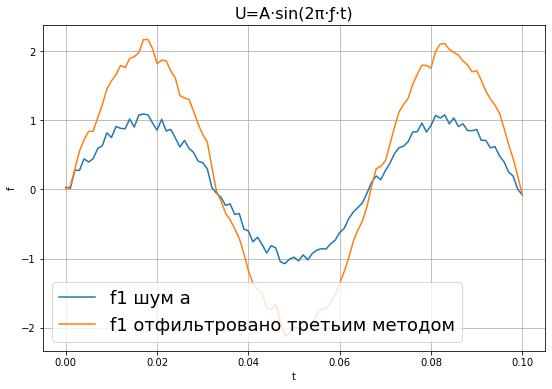

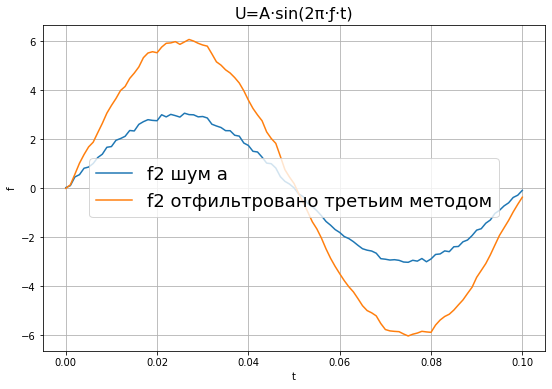

In [7]:
# Применим третий метод

f1_a_pandas['filtered_2'] = f1_a_pandas['data'].rolling(window=2).sum()
f1_a_pandas_filled = f1_a_pandas.fillna(0)
f2_a_pandas['filtered_2'] = f2_a_pandas['data'].rolling(window=2).sum()
f2_a_pandas_filled = f2_a_pandas.fillna(0)

# Посмотрим, что получилось c графиком f1
show_plot((f1_a_pandas_filled['data'], 'f1 шум a'),
          (f1_a_pandas_filled['filtered_2'], 'f1 отфильтровано третьим методом'))
print()
# Посмотрим, что получилось c графиком f2
show_plot((f2_a_pandas_filled['data'], 'f2 шум a'),
          (f2_a_pandas_filled['filtered_2'], 'f2 отфильтровано третьим методом'))

Вывод. Первый метод лучше восстанавливает исходные данные без шума.

3.	Загрузить данные из файла CSV. Вывести их на экран в виде графика.

| Датасет | Столбец 1 | Столбец 2 |
| :-: | :-: | :-: |
| Experiment.csv | device1 | device2 |


In [8]:
# https://campus.fa.ru/mod/folder/download_folder.php?id=351804

# Прочитаем данные из файла, приведем форматы дат и чисел, уберем лишние столбцы
df = pd.read_csv('Experiment.csv', encoding='cp1251', delimiter=';', decimal=',')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.reindex(columns=['date', 'device1', 'device2'])
df.head()

,date,device1,device2
0,2022-01-01,5.718678,6.676022
1,2022-01-07,96.835323,14.110242
2,2022-01-13,50.782777,71.259009
3,2022-01-19,70.524464,17.698874
4,2022-01-25,36.525051,7.558264


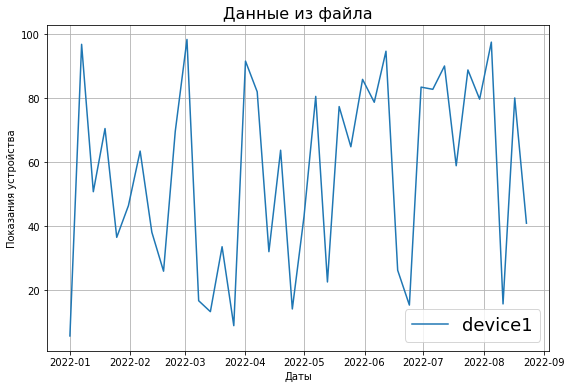

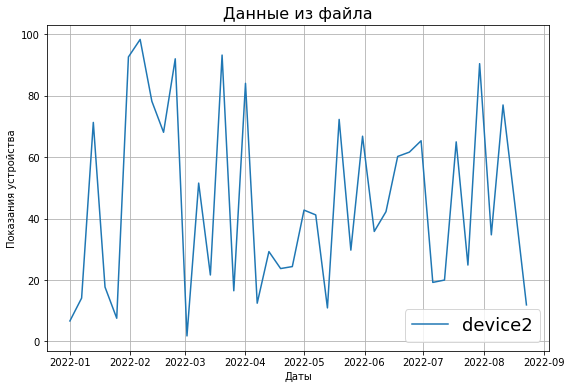

In [9]:
# Определим функцию для отрисовки графиков
def show_plot_fe(*args):
    '''
    Формат: кортежи из датафрейма и названия столбца
    Пример: (df, 'Column1'), ..., (df, 'Column2')
    '''
    import pandas as pd
    import matplotlib.pyplot as plt
    plt.figure(figsize=(9, 6))
    plt.title('Данные из файла', fontsize=16)
    plt.xlabel('Даты')
    plt.ylabel('Показания устройства')
    plt.grid(True)
    for arg in args:
        plt.plot(arg[0]['date'].values, arg[0][arg[1]], label=arg[1])
    plt.legend(fontsize=18)
    plt.show()

# Посмотрим на наши данные
show_plot_fe((df, 'device1'))
print()
show_plot_fe((df, 'device2'))

4.	Применить в этим данных фильтрацию скользящего среднего (три метода). Вывести на экран в виде графика одновременно с исходными значениями.

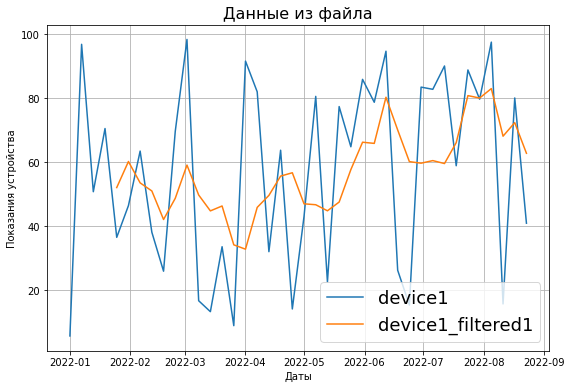

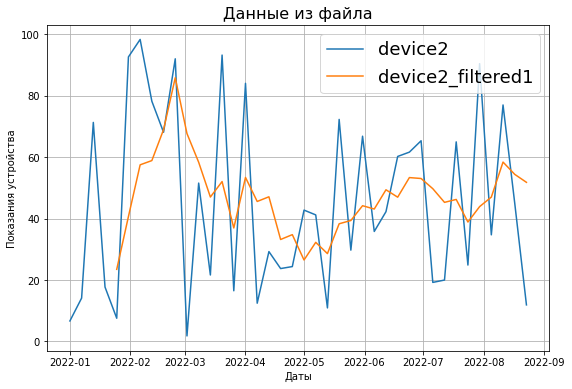

In [10]:
# Применим первый метод
df['device1_filtered1'] = df['device1'].rolling(window=5).mean()
df['device2_filtered1'] = df['device2'].rolling(window=5).mean()

# Посмотрим, что получилось c графиком device1
show_plot_fe((df, 'device1'),
             (df, 'device1_filtered1'))
print()
# Посмотрим, что получилось c графиком device2
show_plot_fe((df, 'device2'),
             (df, 'device2_filtered1'))

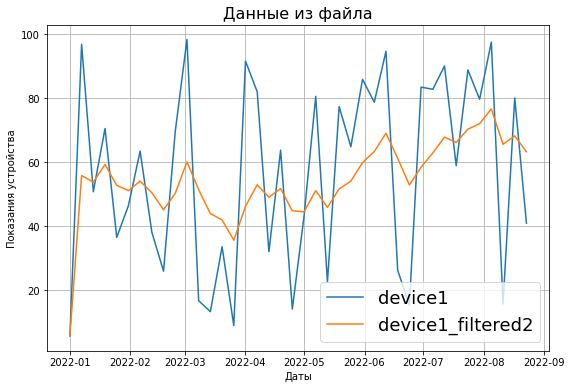

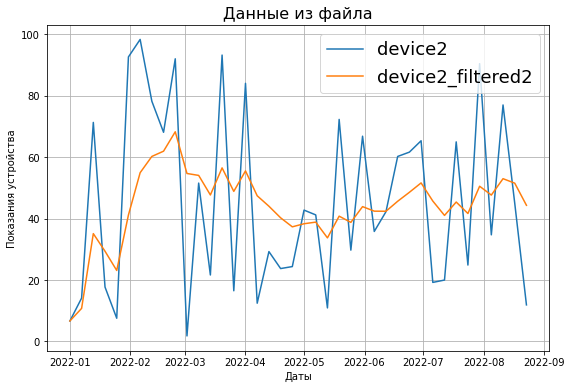

In [11]:
# Применим второй метод
df['device1_filtered2'] = df['device1'].ewm(span=10).mean()
df['device2_filtered2'] = df['device2'].ewm(span=10).mean()

# Посмотрим, что получилось c графиком device1
show_plot_fe((df, 'device1'),
             (df, 'device1_filtered2'))
print()
# Посмотрим, что получилось c графиком device2
show_plot_fe((df, 'device2'),
             (df, 'device2_filtered2'))

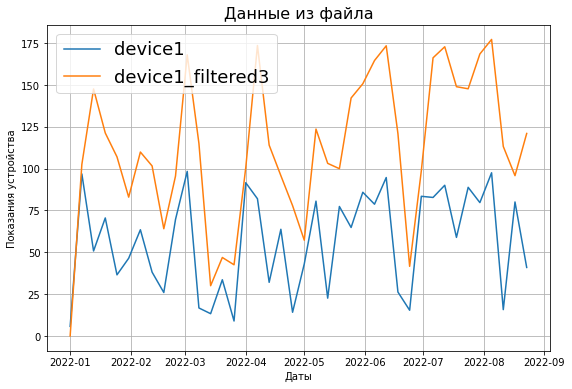

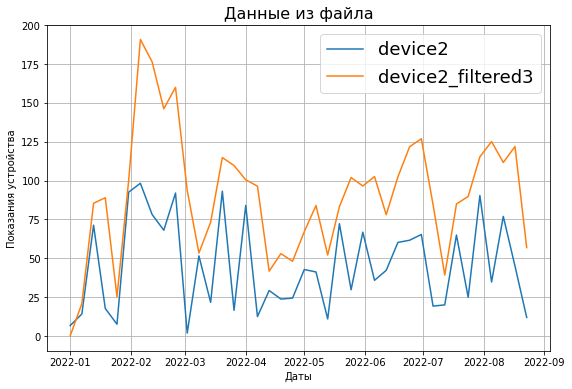

In [12]:
# Применим третий метод
df['device1_filtered3'] = df['device1'].rolling(window=2).sum()
df['device2_filtered3'] = df['device2'].rolling(window=2).sum()
df_filled = df.fillna(0)
# Посмотрим, что получилось c графиком device1
show_plot_fe((df_filled, 'device1'),
             (df_filled, 'device1_filtered3'))
print()
# Посмотрим, что получилось c графиком device2
show_plot_fe((df_filled, 'device2'),
             (df_filled, 'device2_filtered3'))

Вывод. Для данного набора данных лучше всего подходит второй метод (EWM).